In [1]:
%autosave 2

Autosaving every 2 seconds


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("ex1data2.txt")

In [4]:
data.head()

,2104,3,399900
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


In [5]:
data.describe()

,2104,3,399900
count,46.000000,46.000000,46.000000
mean,1998.434783,3.173913,339119.456522
std,803.333019,0.768963,126103.418369
min,852.000000,1.000000,169900.000000
25%,1429.500000,3.000000,249900.000000
50%,1870.000000,3.000000,299900.000000
75%,2284.500000,4.000000,368875.000000
max,4478.000000,5.000000,699900.000000


In [6]:
def featureNormalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean)/std
    return X_norm, mean, std

In [7]:
def computeCost(X, y, theta):
    predictions = X.dot(theta)
    square_err = (predictions - y)**2
    return 1/(2*m) * np.sum(square_err)

In [8]:
def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = [] #to store all values of costs
    for _ in range(num_iters):
        product_term = X.dot(theta)
        temp = np.dot(X.transpose(), (product_term - y))
        theta -= (alpha / m) * temp
        J_history.append(computeCost(X, y, theta))
    return J_history, theta

In [9]:
data_n = data.values
m = len(data_n[:, -1])
X = data_n[:, :-1]
X, mean, std = featureNormalize(X)
X = np.append(np.ones((m, 1)), X, axis=1)
y = data_n[:, -1].reshape(m, 1)
theta = np.zeros((np.shape(data_n)[1], 1))

In [10]:
computeCost(X, y, theta)

65279190347.902176

In [11]:
J_history, theta = gradientDescent(X, y, theta, 0.01, 400)

In [12]:
theta

array([[333032.07465084],
       [100130.7408761 ],
       [  3699.66611303]])

Text(0.5, 1.0, 'Cost function using Gradient Descent')

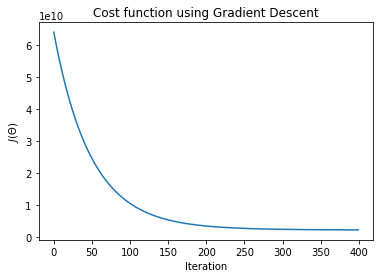

In [13]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [16]:
from sklearn.metrics import r2_score
y_pred = X.dot(theta)
accuracy = r2_score(y, y_pred)
accuracy

0.7262683631134405

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)
regressor.intercept_
regressor.coef_

array([[     0.        , 110248.92165868,  -6226.22670553]])

In [21]:
y_pred_regressor = regressor.predict(X)

In [22]:
accuracy_regressor = r2_score(y, y_pred_regressor)
accuracy_regressor

0.7343207791741682